# Creating a Multipolygon Layer from a Point Layer

## Our Approach

In order to solve this problem, we are considering the input data in the form of a raster image. 

<img src="../images/bgm2.png", style="width: 50vw;">

Input Raster:

<img src="../images/bgm4.png", style="width: 50vw;">

The raster image that we are looking at consists of points which are of different colors, signifying the data points with different features (i.e., observations belonging to different classes). Each class of points can by itself form a polygon and all the polygons can be put together to create a Multi-Polygon. The steps we follow to do this are:

1. Loading the libraries and raster data
2. Identification of individual classes of points through image binarization and plotting a concave hull
3. Combining all concave hulls to create a Multi-polygon plot
4. Plotting a convex hull with all points irrespective of classes
5. Identifying unmapped area 
6. Applying distance, laplacian and local maxima transforms on unmapped area
7. Re-plotting concave hulls with stitched boundaries to get the clean Multi-Polygon layer

### Step 1 - Loading the libraries and raster data

The below code loads all the libraries required, a helper_functions package which consists of all the functions required to perform the analysis and the input raster image.

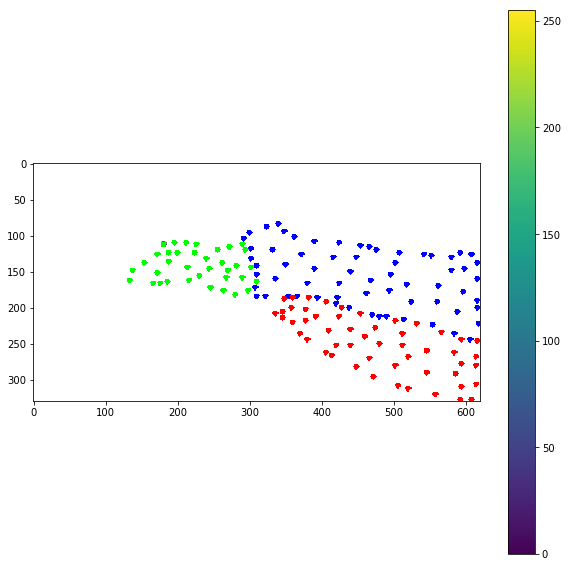

In [1]:
# Importing all libraries

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import Polygon
import cv2 
from PIL import Image, ImageDraw
import skimage
from skimage import measure 
from skimage.filters import threshold_otsu,laplace
from skimage.measure import label
from skimage import exposure
from skimage.morphology import closing, square,disk, extrema
import fiona
import shapely.geometry as geometry
from shapely.ops import cascaded_union, polygonize
from scipy.spatial import Delaunay
from scipy import ndimage
from descartes import PolygonPatch
import pylab as pl 
import helper_functions as hf

# reading the input image
img_fd = cv2.imread('bgm4.png')
plt.figure(figsize=(10,10))
plt.imshow(img_fd)
plt.colorbar()
plt.show()

# hint

Click on run to execute the code and proceed

In [2]:
# Solution

# Click on run to execute the code and proceed

In [3]:
ref_tmp_var = True
assert ref_tmp_var

### Step 2 - Identification of individual classes of points through image binarization and plotting a concave hull

In binarizing the image we set a threshold range for detecting points of a specific color and ignoring the rest of the image. Once the points are detected, the centroids of these points are plotted so that they can be used in generating a concave hull, the minimum area enclosure polygon drawn with the given set of points.

We repeat this exercise for all individual classes of points in our input data.

#### Plotting the red points

The below code binarizes the image, identifies the points belonging to the red class and plots a concave hull around those points.

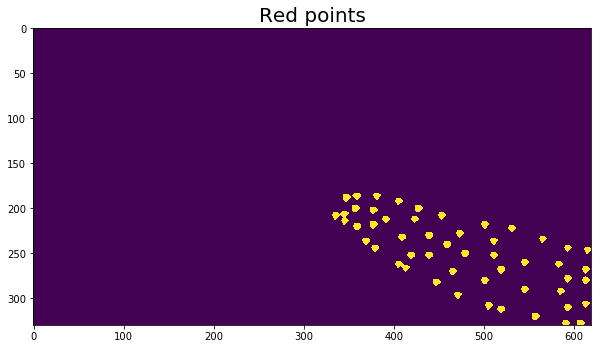

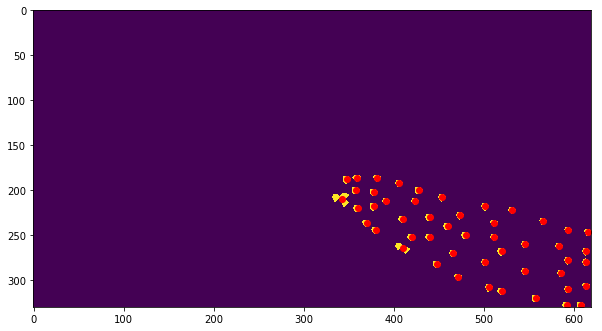

In [4]:
#setting color thresholds
lower_r = [255, 0, 0]
upper_r = [255, 15, 15]

# creating a binary image for the given color range
bw_r = hf.get_bw(lower_r, upper_r, img_fd)

# plotting the binarized image
plt.figure(figsize=(10, 10))
plt.imshow(bw_r)
plt.title('Red points', fontsize=20)
plt.show()

# plotting centroids of the points
pts_r = hf.show_points(bw_r)

# plotting a concave hull for the identified points
concave_hull_r, edge_pts_r, x_r, y_r = hf.get_alpha_shape(pts_r, 0.01)

# hint

Click on run to execute the code and proceed

In [5]:
# Solution

# Click on run to execute the code and proceed

In [6]:
ref_tmp_var = True
assert ref_tmp_var

#### Plotting the blue points

The below code binarizes the image, identifies the points belonging to the blue class and plots a concave hull around those points.

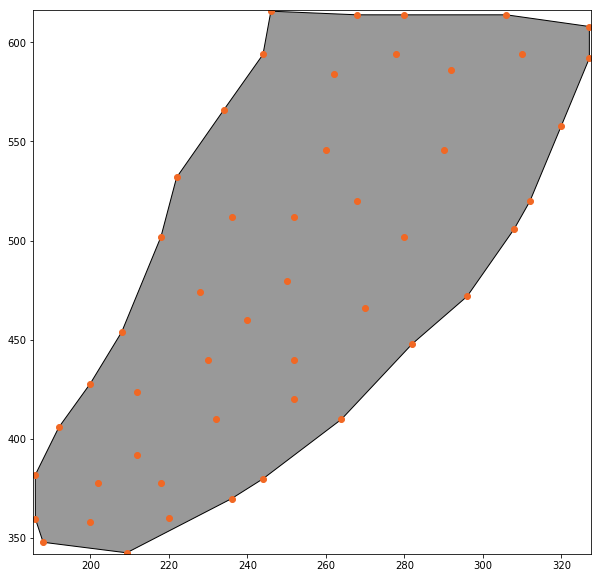

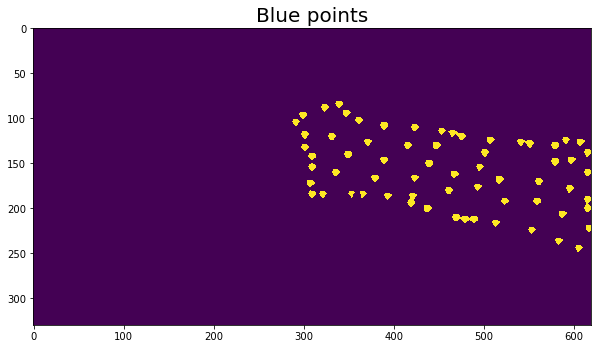

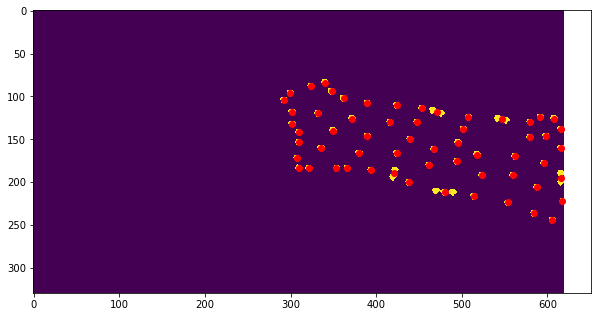

In [7]:
#setting color thresholds
lower_b = [0, 0, 255]
upper_b = [15, 15, 255]

# creating a binary image for the given color range
bw_b = hf.get_bw(lower_b, upper_b, img_fd)

# plotting the binarized image
plt.figure(figsize=(10, 10))
plt.title('Blue points', fontsize=20)
plt.imshow(bw_b)
plt.show()

# plotting centroids of the points
pts_b = hf.show_points(bw_b)

# plotting a concave hull for the identified points
concave_hull_b, edge_pts_b, x_b, y_b = hf.get_alpha_shape(pts_b, 0.01)

# hint

Click on run to execute the code and proceed

In [8]:
# Solution

# Click on run to execute the code and proceed

In [9]:
ref_tmp_var = True
assert ref_tmp_var

#### Plotting the green points

The below code binarizes the image, identifies the points belonging to the green class and plots a concave hull around those points.

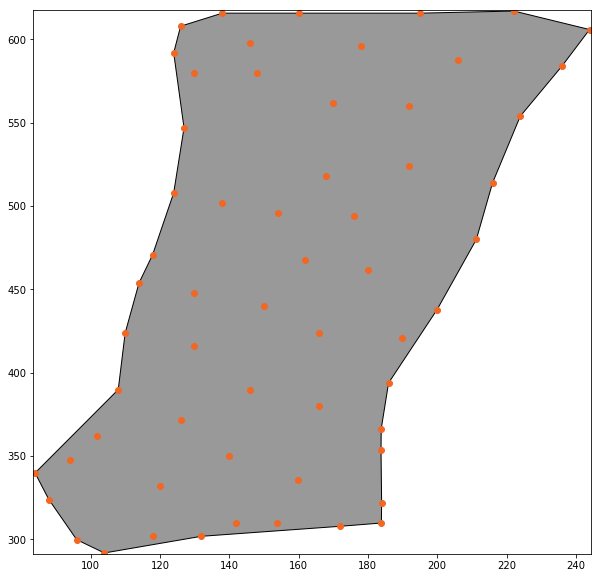

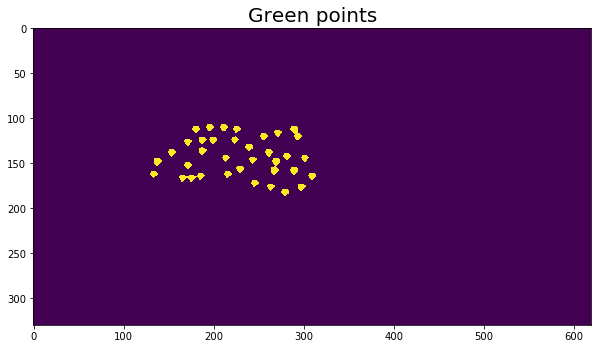

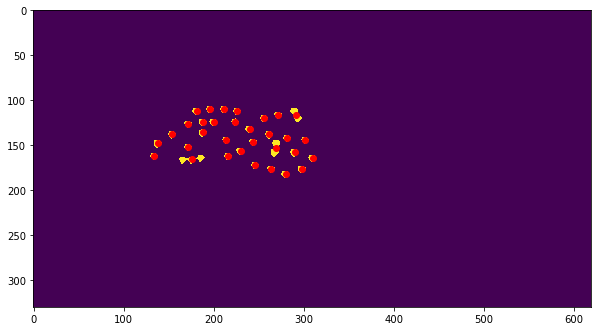

In [10]:
#setting color thresholds
lower_g = [0, 255, 0]
upper_g = [15, 255, 15]

# creating a binary image for the given color range
bw_g = hf.get_bw(lower_g, upper_g, img_fd)

# plotting the binarized image
plt.figure(figsize=(10, 10))
plt.title('Green points', fontsize=20)
plt.imshow(bw_g)
plt.show()

# plotting centroids of the points
pts_g = hf.show_points(bw_g)

# plotting a concave hull for the identified points
concave_hull_g, edge_pts_g, x_g, y_g = hf.get_alpha_shape(pts_g, 0.01)

# hint

Click on run to execute the code and proceed

In [11]:
# Solution

# Click on run to execute the code and proceed

In [12]:
ref_tmp_var = True
assert ref_tmp_var

### Step 3 - Combining all concave hulls to create a Multipolygon plot

We now use the 'plot_multipolygon' helper function to combine all concave hulls and plot them together. This is not essentially a multipolygon layer as there may be gaps and polygons in a multipolygon layer have a shared boundary.

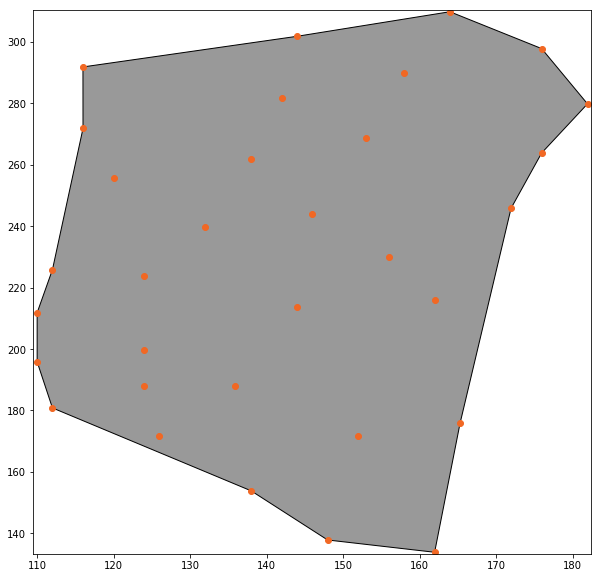

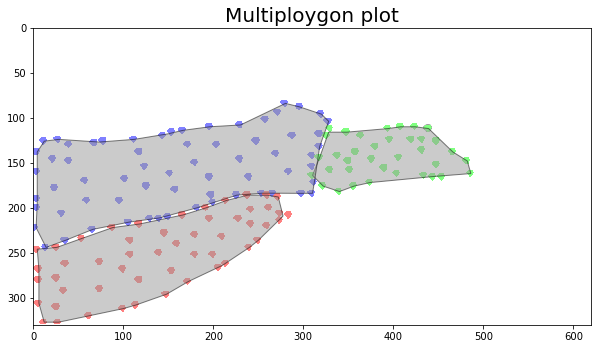

In [13]:
# Plotting the multipolygon layer
hf.plot_multipolygon([concave_hull_g, concave_hull_b, concave_hull_r],np.fliplr(img_fd), tx =145, ty=-145)

# hint

Click on run to execute the code and proceed

In [14]:
# Solution

# Click on run to execute the code and proceed

In [15]:
ref_tmp_var = True
assert ref_tmp_var

### Step 4 - Plotting a convex hull with all points irrespective of classes

We use 'all_points' helper function to identify all points irrespective of classes. Then we use the alpha shape function, but vary the alpha paramater in order to obtain a polygon similar in nature to a convex hull, drawn around the set of points.

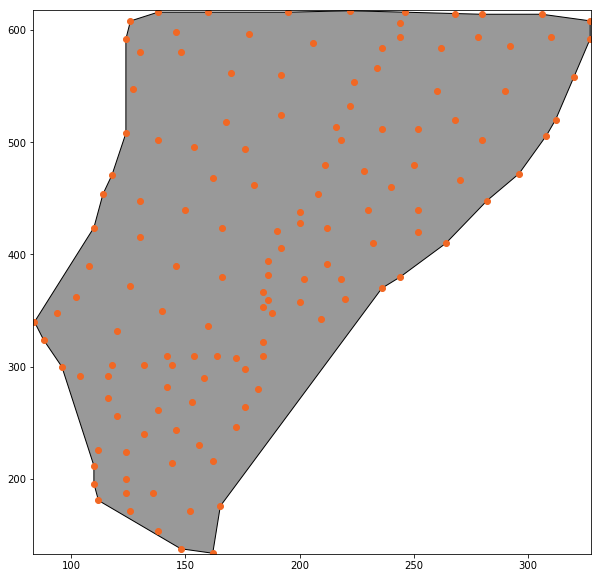

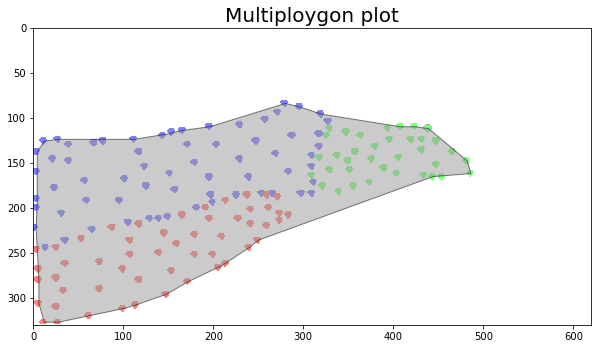

In [16]:
# getting all points irrespective of classes
all_pts = hf.all_points(pts_g, pts_b, pts_r)

# convex hull with all points
convex_hull_full, edge_pts_full,x_full,y_full = hf.get_alpha_shape(all_pts,0.003)

# Plotting the convex hull
hf.plot_multipolygon([convex_hull_full],np.fliplr(img_fd),tx=145, ty=-145)

# hint

Click on run to execute the code and proceed

In [17]:
# Solution

# Click on run to execute the code and proceed

In [18]:
ref_tmp_var = True
assert ref_tmp_var

### Step 5 - Identifying unmapped area

We use 'get_unmapped_area' helper function which is a combination of symmetric difference and intersection functions to identify the unmapped area in the point layer. The unmapped are that is most critical is the gap between two adjacent polygons. This is the gap that we need to identify and bridge.

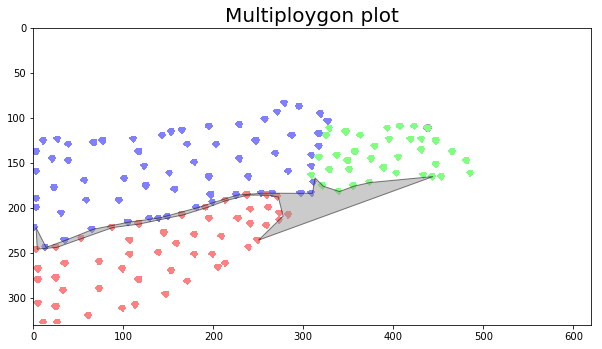

In [19]:
# identifying the unmapped area
all_unmapped_area = hf.get_unmapped_area(convex_hull_full, concave_hull_g, concave_hull_r, concave_hull_b)

# plotting the most-significant unmapped area
hf.plot_multipolygon([all_unmapped_area[4]],np.fliplr(img_fd),tx=145, ty=-145)

# hint

Click on run to execute the code and proceed

In [20]:
# Solution

# Click on run to execute the code and proceed

In [21]:
ref_tmp_var = True
assert ref_tmp_var

### Step 6 - Applying distance, laplacian and local maxima transforms on unmapped area

The distance transforms, laplacian transforms and local maxima identify the distance between points in all classes, the closest pairs of points in each class - which essentially form the nearest boundary points in either class and the  midpoints between the distances.

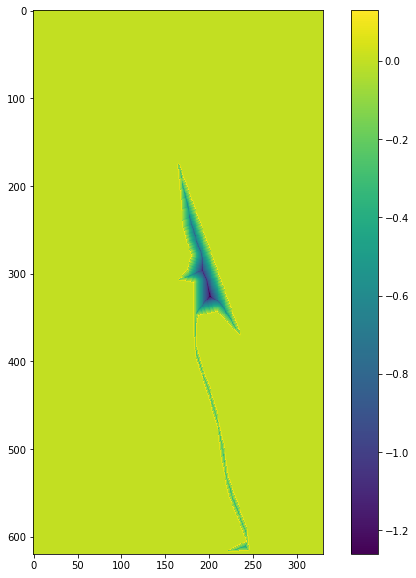

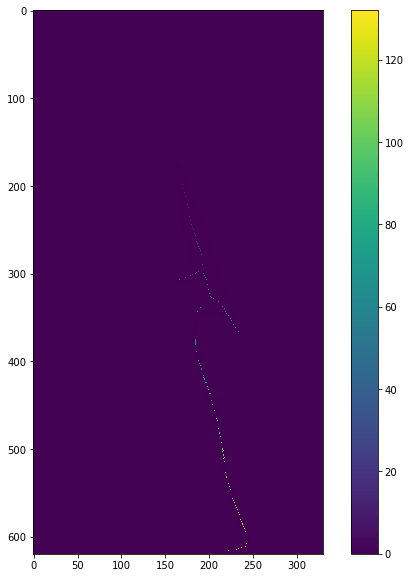

In [22]:
# Obtaining local maxima by applying distance and laplacian transforms
unmapped_boundary=list(all_unmapped_area[2].boundary.coords)
bp_unmapped_init= list(all_unmapped_area[4].boundary.coords)
all_pts_init= hf.get_maxima_points(bp_unmapped_init, img_fd, sigma= 0.5)

# Adding new boundary points to each class
add_r_pts,distances = hf.add_points(all_pts_init, concave_hull_r,10)    
add_b_pts ,distances = hf.add_points(all_pts_init, concave_hull_b, 10)    
add_g_pts ,distances = hf.add_points(all_pts_init, concave_hull_g, 10)    

# hint

Click on run to execute the code and proceed

In [23]:
# Solution

# Click on run to execute the code and proceed

In [24]:
ref_tmp_var = True
assert ref_tmp_var

### Step 7 - Re-plotting concave hulls with stitched boundaries to get the clean Multi-Polygon layer

In this final stage, we identify internal points to map out the structure of point layer distribution in each class, generate new concave hulls with re-drawn boundaries, and finally plot the multipolygon layer with clean, shared boundaries.

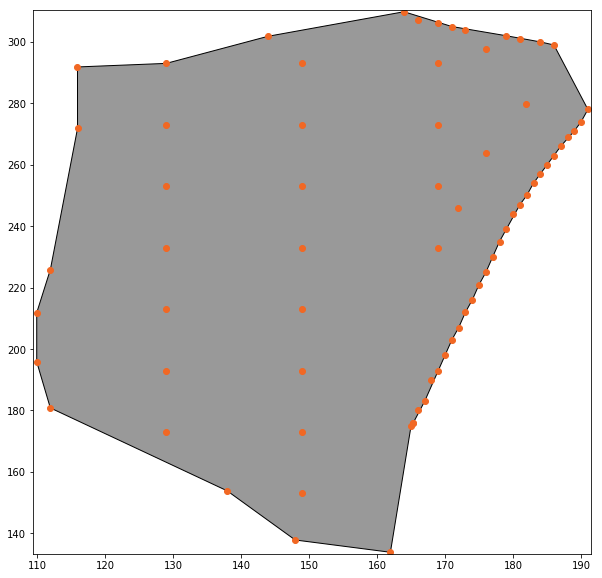

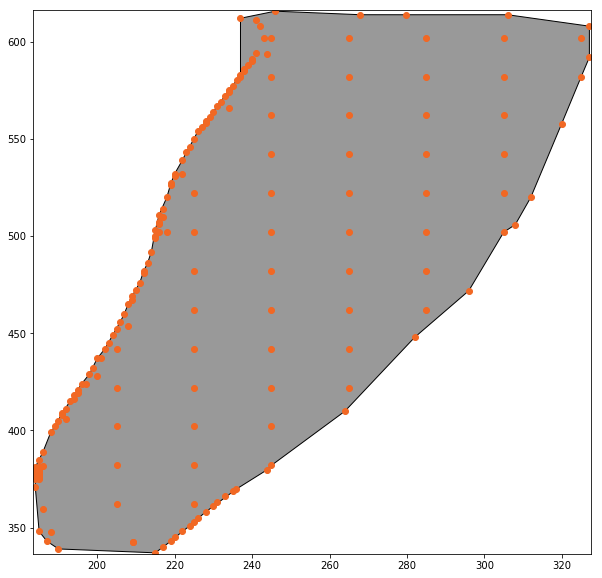

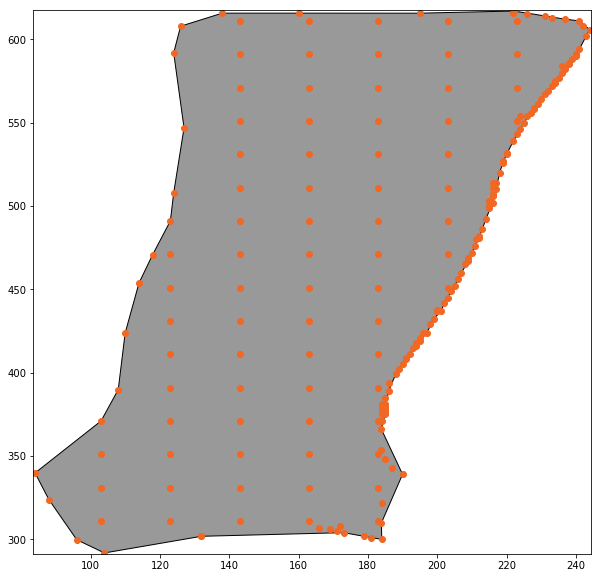

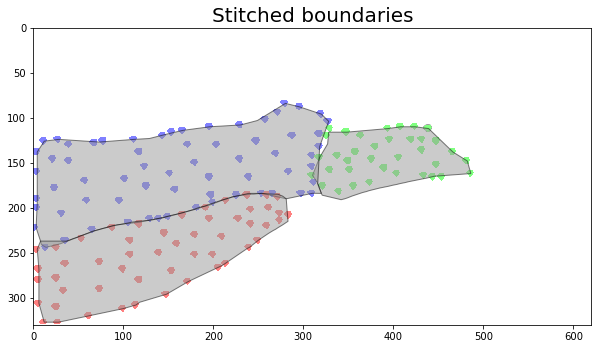

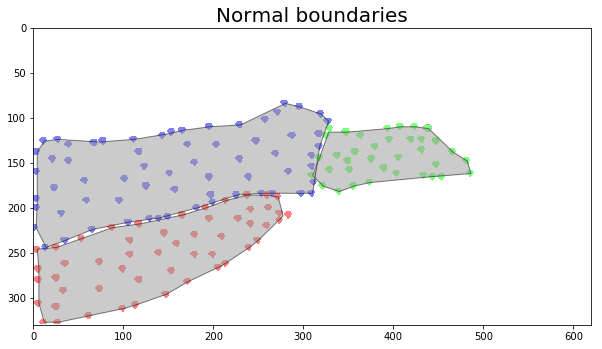

In [25]:
##################### Plotting internal points #################

# green points 
inside_g_points = hf.get_inside_points(x_interval=20,y_interval=20,polygon=concave_hull_g)

g_ext_pts = list(concave_hull_g.exterior.coords) 
new_g_pts = g_ext_pts + [tuple(x) for x in add_g_pts]+ inside_g_points 

# red points
inside_r_points = hf.get_inside_points(x_interval=20,y_interval=20,polygon=concave_hull_r)

r_ext_pts = list(concave_hull_r.exterior.coords)
new_r_pts =  r_ext_pts+ [tuple(x) for x in add_r_pts] + inside_r_points

# blue points
inside_b_points = hf.get_inside_points(x_interval=20,y_interval=20,polygon=concave_hull_b)

b_ext_pts = list(concave_hull_b.exterior.coords)
new_b_pts =b_ext_pts+ [tuple(x) for x in add_b_pts]+ inside_b_points

#################################################################

# generate new_ hulls
new_concave_hull_g, new_edge_pts_g,new_x_g,new_y_g= hf.get_alpha_shape(new_g_pts,0.03)
new_concave_hull_r, new_edge_pts_r,new_x_p,new_y_p= hf.get_alpha_shape(new_r_pts,0.02)
new_concave_hull_b, new_edge_pts_b,new_x_pk,new_y_b= hf.get_alpha_shape(new_b_pts,0.02)

# plotting the new multipolygon with stitched boundaries
hf.plot_multipolygon([new_concave_hull_g, new_concave_hull_b, new_concave_hull_r], np.fliplr(img_fd),tx= 145, ty= -145, plt_title ='Stitched boundaries')

# plotting old multipolygon for comparison
hf.plot_multipolygon([concave_hull_g, concave_hull_b,concave_hull_r], np.fliplr(img_fd),tx= 145, ty= -145,plt_title=  'Normal boundaries')


# hint

Click on run to execute the code and proceed

In [26]:
# Solution

# Click on run to execute the code and proceed

In [27]:
ref_tmp_var = True
assert ref_tmp_var